In [1]:
# Import required libraries
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [2]:
# Function to check if a time series is stationary using the ADF test
def check_stationarity(time_series):
    # Perform Augmented Dickey-Fuller test
    result = adfuller(time_series)
    
    # Extracting results from the test
    adf_statistic = result[0]
    p_value = result[1]
    used_lag = result[2]
    num_observations = result[3]
    critical_values = result[4]
    
    # Output the results
    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    print(f'Used Lag: {used_lag}')
    print(f'Number of Observations Used: {num_observations}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}: {value}')
    
    # Interpretation of the results
    if p_value < 0.05:
        print("\nThe time series is stationary (Reject H0)")
    else:
        print("\nThe time series is not stationary (Fail to reject H0)")

In [3]:
data = {'Date': pd.date_range(start='2020-01-01', periods=100, freq='D'),
        'Value': [1.1, 1.3, 1.2, 1.5, 1.4, 1.8, 2.1, 2.4, 2.2, 2.5] * 10}

In [4]:
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

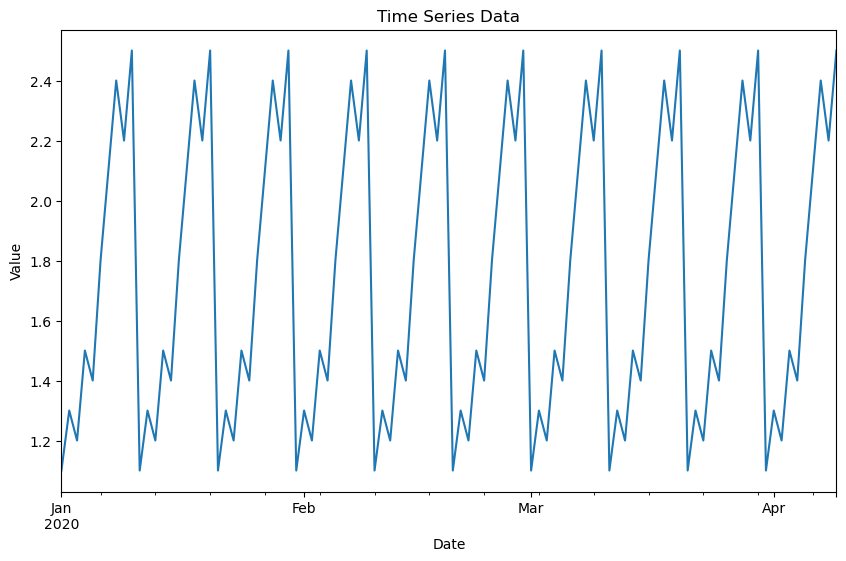

In [5]:
# Visualizing the time series data
plt.figure(figsize=(10, 6))
df['Value'].plot(title="Time Series Data", xlabel="Date", ylabel="Value")
plt.show()

In [6]:
# Checking if the time series is stationary
check_stationarity(df['Value'])

ADF Statistic: -3486614465686027.5
p-value: 0.0
Used Lag: 12
Number of Observations Used: 87
Critical Values:
   1%: -3.5078527246648834
   5%: -2.895382030636155
   10%: -2.584823877658872

The time series is stationary (Reject H0)


In [11]:
# Step 1: Generate Non-Stationary Time Series Data
np.random.seed(42)

# Date range (e.g., 1 year of daily data)
dates = pd.date_range('2020-01-01', periods=365, freq='D')

# Creating a trend (e.g., linear increase over time)
trend = np.linspace(0, 10, 365)

# Adding seasonality (e.g., sine wave to simulate seasonal effect)
seasonal = 10 * np.sin(np.linspace(0, 3 * np.pi, 365))

# Adding noise (random fluctuations)
noise = np.random.normal(0, 2, 365)

# Combine them to form the non-stationary time series
data = trend + seasonal + noise

# Create the DataFrame
df = pd.DataFrame(data, index=dates, columns=['Value'])

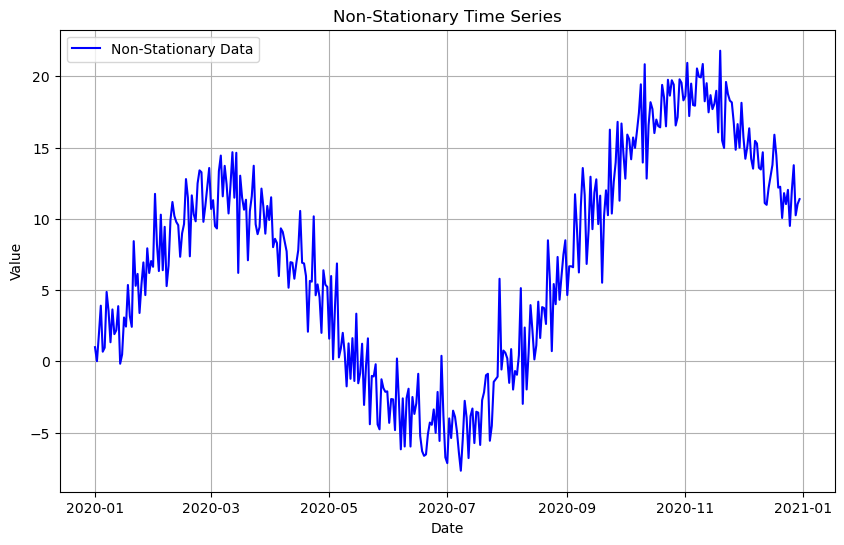

In [12]:
# Plot the non-stationary time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], label='Non-Stationary Data', color='b')
plt.title('Non-Stationary Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Step 2: Perform ADF Test on the Original Series
result = adfuller(df['Value'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If p-value > 0.05, the data is non-stationary
if result[1] > 0.05:
    print("The time series is non-stationary (p-value > 0.05)")

ADF Statistic: -0.8917149128748127
p-value: 0.7906885697896193
The time series is non-stationary (p-value > 0.05)


In [14]:
# Step 3: Apply Differencing to Make it Stationary
df['Differenced'] = df['Value'].diff()

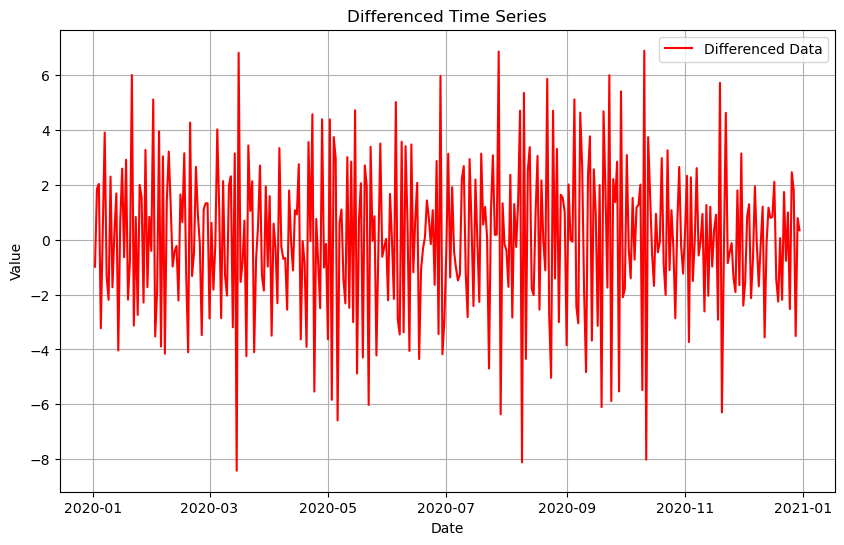

In [15]:
# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(df.index[1:], df['Differenced'][1:], label='Differenced Data', color='r')  # Slice to match index
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Step 4: Perform ADF Test on the Differenced Series
result_diff = adfuller(df['Differenced'].dropna())
print(f'ADF Statistic (Differenced): {result_diff[0]}')
print(f'p-value (Differenced): {result_diff[1]}')

# If p-value < 0.05, the series is now stationary
if result_diff[1] < 0.05:
    print("The differenced time series is stationary (p-value < 0.05)")

ADF Statistic (Differenced): -14.145346915534041
p-value (Differenced): 2.2091804248043867e-26
The differenced time series is stationary (p-value < 0.05)


                               SARIMAX Results                                
Dep. Variable:            Differenced   No. Observations:                  364
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -793.350
Date:                Wed, 12 Feb 2025   AIC                           1594.700
Time:                        02:27:06   BIC                           1610.289
Sample:                    01-02-2020   HQIC                          1600.896
                         - 12-30-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0276      0.032      0.852      0.394      -0.036       0.091
ar.L1         -0.1331      0.074     -1.789      0.074      -0.279       0.013
ma.L1         -0.6798      0.054    -12.579      0.0

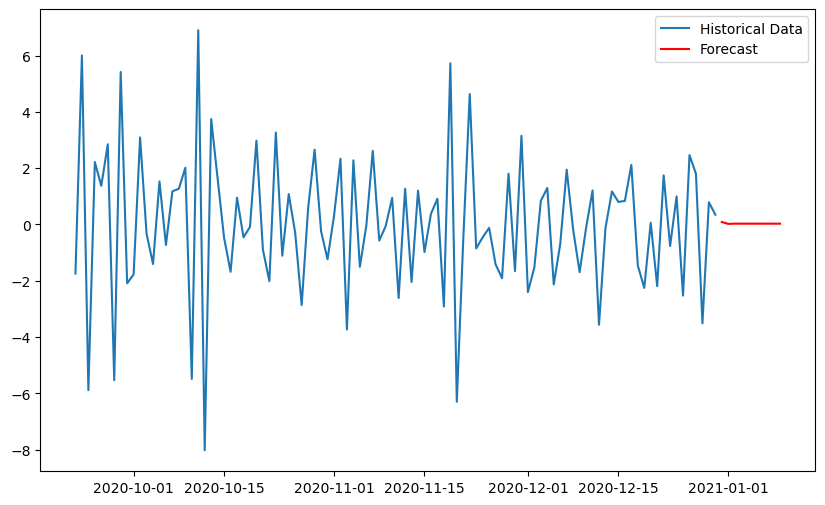

In [17]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (with differenced data)
model = ARIMA(df['Differenced'].dropna(), order=(1, 0, 1))  # (p, d, q) parameters
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast the next steps
forecast = model_fit.forecast(steps=10)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index[-100:], df['Differenced'][-100:], label='Historical Data')
plt.plot(pd.date_range(df.index[-1], periods=11, freq='D')[1:], forecast, label='Forecast', color='red')
plt.legend()
plt.show()
